# Chapter 11 In-chapter examples

In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 11.1: Goals of the t-test

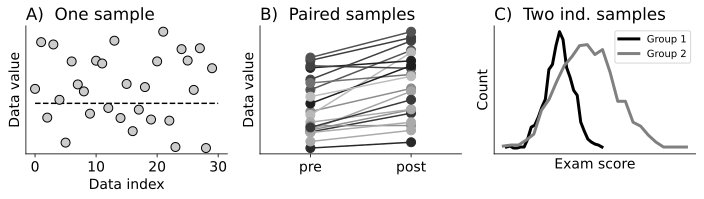

In [3]:
_,axs = plt.subplots(1,3,figsize=(10,3))

# panel A: one-sample t-test
data = np.random.normal(loc=.5,size=30)
axs[0].plot(data,'ko',markersize=9,markerfacecolor=(.8,.8,.8))
axs[0].plot([0,len(data)],[0,0],'k--',zorder=-10)
axs[0].set(xlabel='Data index',ylabel='Data value',yticks=[],
           title=r'A)  One sample')



# panel B: paired-samples t-test
N = 20
data1 = np.random.normal(size=N)
data2 = data1 + .5 + np.random.randn(N)*.4
for x,y in zip(data1,data2):
  # pick a random color
  c = np.random.uniform(low=0,high=.8)

  # plot it
  axs[1].plot([0,1],[x,y],'o-',markersize=9,markerfacecolor=(c,c,c),color=(c,c,c))

# plot adjustments
axs[1].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['pre','post'],
           yticks=[],ylabel='Data value',title=r'B)  Paired samples')



# panel C: two-samples t-test
for i in range(2):

  # create the data
  data = np.random.normal(loc=i,scale=(i+1)/2,size=1000)

  # take their histogram
  yy,xx = np.histogram(data,bins='fd')
  xx = (xx[1:]+xx[:-1])/2

  # plot
  c = i/2
  axs[2].plot(xx,yy,linewidth=3,color=(c,c,c))

# plot adjustments
axs[2].set(xlabel='Exam score',ylabel='Count',xticks=[],yticks=[],title=r'C)  Two ind. samples')
axs[2].legend(['Group 1','Group 2'],loc='upper right',fontsize=10)


# display the figure
plt.tight_layout()
plt.show()

### Fig 11.2: t-pdf

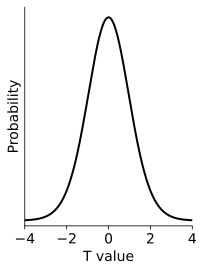

In [4]:
t = np.linspace(-4,4,573)

# a pdf with df=20
tpdf = stats.t.pdf(t,20)

plt.figure(figsize=(3,4))
plt.plot(t,tpdf,'k',linewidth=2)
plt.xlabel('T value')
plt.ylabel('Probability')
plt.yticks([])
plt.ylim([-.01,np.max(tpdf)*1.05])
plt.xlim(t[[0,-1]])

# display the figure
plt.tight_layout()
plt.show()

### Computing p-values for one tailed and two tailed tests

In [6]:
tval = 2.1
df = 13

pvalL = stats.t.cdf(-tval,df)
pvalR = stats.t.sf(tval,df)   #1-stats.t.cdf(tval,df)
pval2 = pvalR+pvalL

print(f'One-tailed p-value on the left:  {pvalL}')
print(f'One-tailed p-value on the right: {pvalR}')
print(' ')
print(f'Two-tailed p-value as the sum:   {pvalL+pvalR}')
print(f'Two-tailed p-value by doubling:  {2*pvalL}')
     

# 1-cdf vs survival function:
pvalC = 1-stats.t.cdf(tval,df)
pvalS = stats.t.sf(tval,df) # sf = survival function

print(f'P-value from 1-cdf: {pvalC}')
print(f'P-value from s.f.:  {pvalS}')
print(f'Difference:         {pvalC-pvalS}')

# So: The difference for this particular t-value is at machine precision.
#  can also use sf instead of 1-cdf.

One-tailed p-value on the left:  0.027906302135628887
One-tailed p-value on the right: 0.027906302135628887
 
Two-tailed p-value as the sum:   0.055812604271257775
Two-tailed p-value by doubling:  0.055812604271257775
P-value from 1-cdf: 0.027906302135628946
P-value from s.f.:  0.027906302135628887
Difference:         5.898059818321144e-17
